In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import welch
import scipy.signal as ss
from scipy.signal import spectrogram
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load data
data = pd.read_csv("/content/drive/MyDrive/Path/to/Final297.csv")

column_data = data['Time']
print(column_data)

column1_data = data['Voltage']
print(column1_data)

#data = pd.read_csv("/content/drive/MyDrive/Path/to/Final297.csv", header=None, names=['Time', 'Voltage'],dtype={'Voltage change': np.float64})

#print('Voltage')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0            0.0000
1            0.0001
2            0.0002
3            0.0003
4            0.0004
             ...   
1048570    104.8570
1048571    104.8571
1048572    104.8572
1048573    104.8573
1048574    104.8574
Name: Time, Length: 1048575, dtype: float64
0         -0.063782
1         -0.062866
2         -0.063782
3         -0.061035
4         -0.056458
             ...   
1048570    0.046539
1048571    0.042877
1048572    0.039825
1048573    0.037689
1048574    0.037079
Name: Voltage, Length: 1048575, dtype: float64


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Time     1048575 non-null  float64
 1   Voltage  1048575 non-null  float64
dtypes: float64(2)
memory usage: 16.0 MB


PROBLEM-1
RREADING THE SIGNAL USING PYTHON AND CONVERTING THE CHANGE TO VOLTAGE VELOCITY 

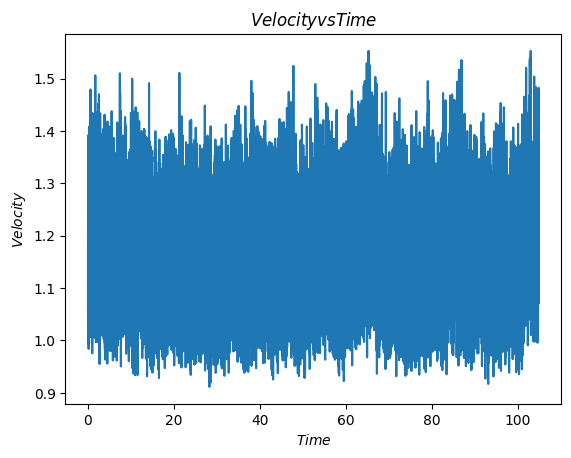

In [42]:



#1  Reading the signal using the python
# Define the voltage to velocity conversion function
def voltage_to_velocity(Voltage):
    u = (((Voltage+1)**2 - 0.5143)/0.3224)**(0.46)
    return u;

# Apply the conversion function to obtain the velocity column
data['Velocity'] = data['Voltage'].apply(voltage_to_velocity)

# Plot the record versus time
plt.plot(data['Time'], data['Velocity'])
plt.xlabel('$Time$')
plt.ylabel('$Velocity$')
plt.title('$Velocity vs Time$')
plt.show()

PROBLEM-2 
Create an ensemble of 1000 signals and plot the first three records versus
time 


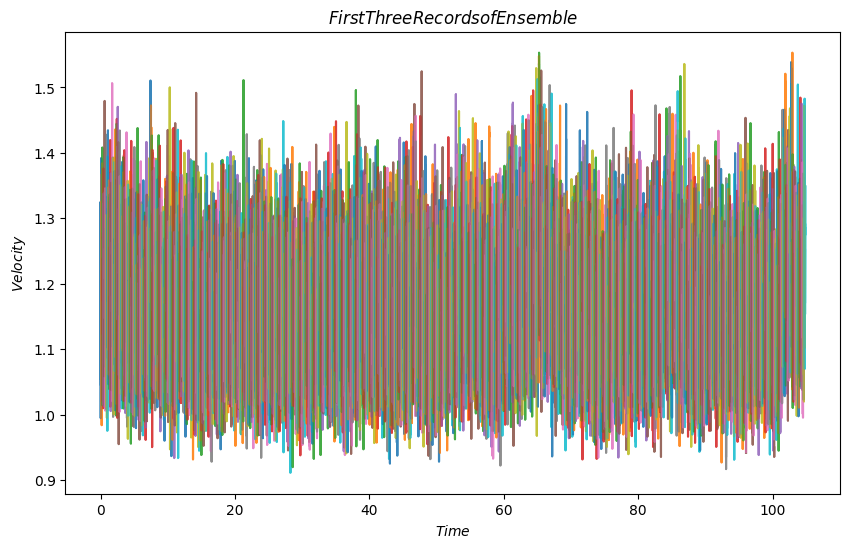

In [43]:

# Divide the signal into equal chunks
chunk_size = len(data) // 1000  # Calculate the chunk size
chunks = np.array_split(data, 1000)  # Split the data into 1000 chunks

# Plot the first three records versus time
plt.figure(figsize=(10, 6))
for i in range(3):
    for chunk in chunks:
        plt.plot(chunk['Time'], chunk['Velocity'].values, alpha=0.5)

plt.xlabel('$Time$')
plt.ylabel('$Velocity$')
plt.title('$First Three Records of Ensemble$')
plt.show()

PROBLEM-3
Calculate the ensemble mean velocity and visualize it against time.

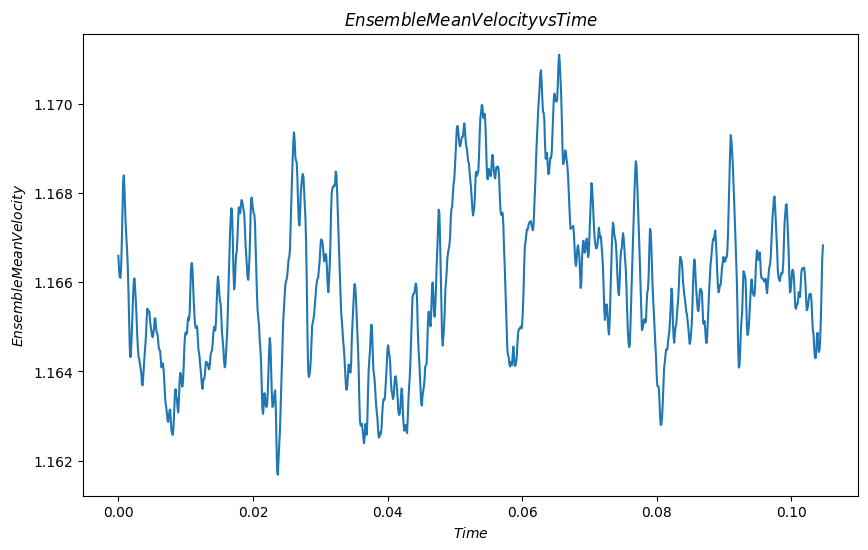

In [44]:
#Ensemble Mean
# Calculate the ensemble mean velocity
# Apply the conversion function to obtain the velocity column
data['Velocity'] = data['Voltage'].apply(voltage_to_velocity)

# Divide the signal into equal chunks
chunk_size = len(data) // 1000  # Calculate the chunk size
num_chunks = len(data) // chunk_size  # Calculate the number of chunks
chunks = np.array_split(data[:num_chunks * chunk_size], num_chunks)  # Split the data into chunks

# Calculate the ensemble mean velocity
ensemble_mean_velocity = np.mean([chunk['Velocity'].values for chunk in chunks], axis=0)

# Plot the ensemble mean velocity against time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'].values[:len(ensemble_mean_velocity)], ensemble_mean_velocity)
plt.xlabel('$Time$')
plt.ylabel('$Ensemble Mean Velocity$')
plt.title('$Ensemble Mean Velocity vs Time$')
plt.show()

PROBLEM 4.1
 For the first three records in the ensemble, calculate the empirical PDF of the u′ and
visualize them

pdf


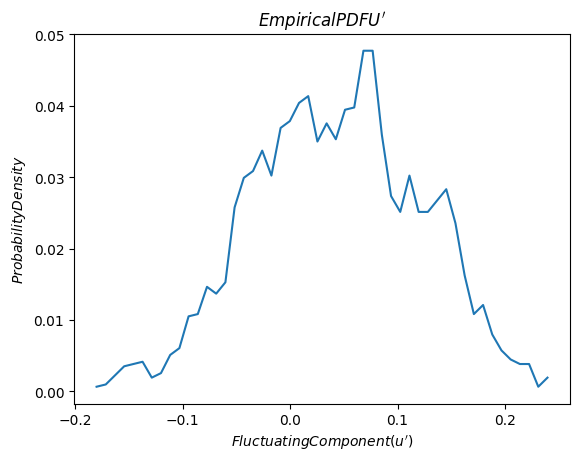

In [45]:



###4.1

# Divide the signal into equal chunks
chunk_size = len(data) // 1000  # Calculate the chunk size
num_chunks = len(data) // chunk_size  # Calculate the number of chunks
chunks = np.array_split(data[:num_chunks * chunk_size], num_chunks)  # Split the data into chunks

# Calculate the ensemble mean velocity
ensemble_mean_velocity = np.zeros(chunks[0]['Velocity'].shape)
for chunk in chunks:
    ensemble_mean_velocity += chunk['Velocity'].values
ensemble_mean_velocity /= len(chunks)

# Extract the fluctuating component (u') for the first three records
u_prime = [chunk['Velocity'].values - ensemble_mean_velocity for chunk in chunks[:3]]
u_prime = np.concatenate(u_prime)

# Calculate the empirical PDF of u'
num_bins = 50  # Number of bins for the histogram
counts, bin_edges = np.histogram(u_prime, bins=num_bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
pdf = counts / np.sum(counts)  # Normalize the counts to obtain PDF
print('pdf')
# Visualize the empirical PDF of u'
plt.plot(bin_centers, pdf)
plt.xlabel("$Fluctuating Component (u')$")
plt.ylabel("$Probability Density$")
plt.title("$Empirical PDF U'$")
plt.show()


PROBLEM 4.2

To determine whether the obtained PDFs of the fluctuating component (u') are following a Gaussian distribution, you can visually inspect the shape of the PDFs. A Gaussian distribution, also known as a normal distribution, is characterized by a symmetric bell-shaped curve.

If the PDFs exhibit a symmetric bell-shaped curve, it suggests that they may follow a Gaussian distribution. However, if the PDFs deviate significantly from a bell-shaped curve or show asymmetry, it indicates a departure from the Gaussian distribution.

You can assess the shape of the PDFs obtained in the previous step by visually inspecting the plots. If the PDFs resemble a symmetric bell-shaped curve, it suggests that the fluctuating component follows a Gaussian distribution to some extent. On the other hand, if the PDFs display significant deviations from a bell-shaped curve, it indicates a departure from the Gaussian distribution.

Inspecting the plots of the empirical PDFs of the fluctuating component (u') will provide insights into their shape and whether they approximate a Gaussian distribution.

PROBLEM 4.3
For each record (realization) in the ensemble, calculating the power spectral density
(PSD) for the u′

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 104857 is greater than input length  = 1048, using nperseg = 1048
  warnings.warn('nperseg = {0:d} is greater than input length '


[[1.15899724e-02 8.51589436e-01 9.35783038e-01 ... 1.30142221e-09
  3.89811973e-08 2.06019211e-08]
 [9.39925116e-03 1.04359244e-01 6.90992812e-01 ... 2.16609951e-07
  3.16109154e-07 3.75138528e-08]
 [6.27813948e-02 7.21843994e-02 1.36621142e+00 ... 2.91313068e-07
  7.57566501e-08 5.72250541e-09]
 ...
 [1.82142690e-03 1.76857563e-01 7.76713547e-01 ... 1.38129768e-07
  2.68808261e-07 9.54708927e-08]
 [1.56570578e-01 3.83298805e-01 2.69043292e-01 ... 8.04604664e-07
  1.52467110e-06 9.17930623e-07]
 [8.18804923e-02 7.14326125e-01 4.44406466e-01 ... 9.27663116e-08
  4.83844014e-07 4.69118523e-07]]


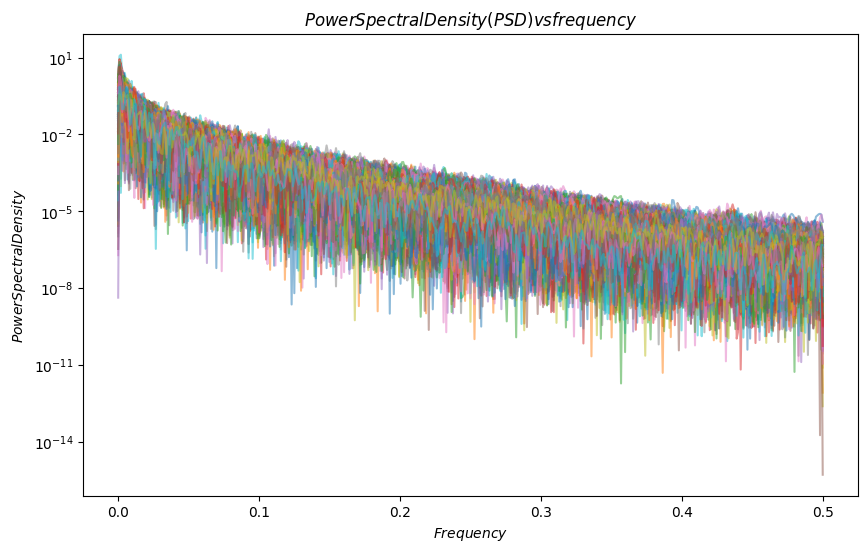

In [46]:
##4.3
from scipy.signal import welch
fs = 1  # Sampling frequency (assuming 1 Hz)
nperseg = len(data) // 10  # Number of samples per segment (adjust as needed)
psd_list = []
for chunk in chunks:
    f, psd = welch(chunk['Velocity'].values - ensemble_mean_velocity, fs=fs, nperseg=nperseg)
    psd_list.append(psd)
psd_list = np.array(psd_list)
print(psd_list)
### Visualize the PSD for each record 
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for i in range(psd_list.shape[0]):
    plt.semilogy(f, psd_list[i], alpha=0.5)
plt.xlabel('$Frequency$')
plt.ylabel('$Power Spectral Density$')
plt.title('$Power Spectral Density (PSD) vs frequency$')
plt.show()



PROBLEM 4.4
Calculating the ensemble mean of the PSDs in part 4.3. and visualize it against the cyclic frequency.

[1.65296169e-01 8.17552910e-01 8.36088617e-01 5.58976890e-01
 3.95816399e-01 2.97813518e-01 2.24985096e-01 1.88429733e-01
 1.58379886e-01 1.28920154e-01 1.14149249e-01 9.60627270e-02
 8.07088882e-02 7.52775212e-02 6.74442524e-02 6.13271204e-02
 5.47622211e-02 4.91439517e-02 4.56578351e-02 4.50202257e-02
 3.87147919e-02 3.60999505e-02 3.26108613e-02 3.02610973e-02
 2.83656576e-02 2.48952099e-02 2.36165977e-02 2.33031266e-02
 2.13643948e-02 1.93669781e-02 1.97342252e-02 1.87835775e-02
 1.72131311e-02 1.56623751e-02 1.56369564e-02 1.52555178e-02
 1.39572192e-02 1.32304783e-02 1.27018457e-02 1.23701899e-02
 1.18970569e-02 1.11462344e-02 1.05355051e-02 1.00861554e-02
 9.42495119e-03 9.13006471e-03 8.94161553e-03 8.11720920e-03
 7.80761469e-03 7.82048477e-03 7.10571793e-03 6.55197477e-03
 6.42872703e-03 6.18924373e-03 5.82145866e-03 5.51508112e-03
 5.45257904e-03 5.45982462e-03 5.21196884e-03 4.75914446e-03
 4.76370440e-03 4.62705707e-03 4.43047129e-03 4.07763013e-03
 4.04870861e-03 3.800622

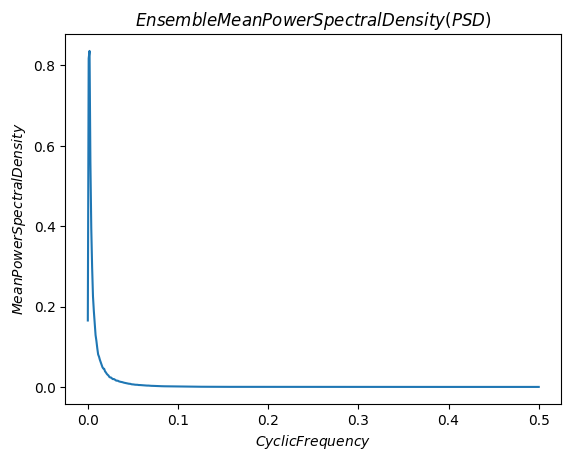

In [47]:
###4.4
mean_psd = np.mean(psd_list, axis=0)
print(mean_psd)
## Visualizing against the cyclic frequency
plt.plot(f, mean_psd)
plt.xlabel('$Cyclic Frequency$')
plt.ylabel('$Mean Power Spectral Density$')
plt.title('$Ensemble Mean Power Spectral Density (PSD)$')
plt.show()


PROBLEM 4.5 
Calculating and visualizing the spectrogram of the velocity fluctuations u′ for the entire
data (not the created ensemble in problem 2). Compare this with a spectrogram of a single
record from the ensemble, and discuss your observations from the localization of the time and
frequencies.




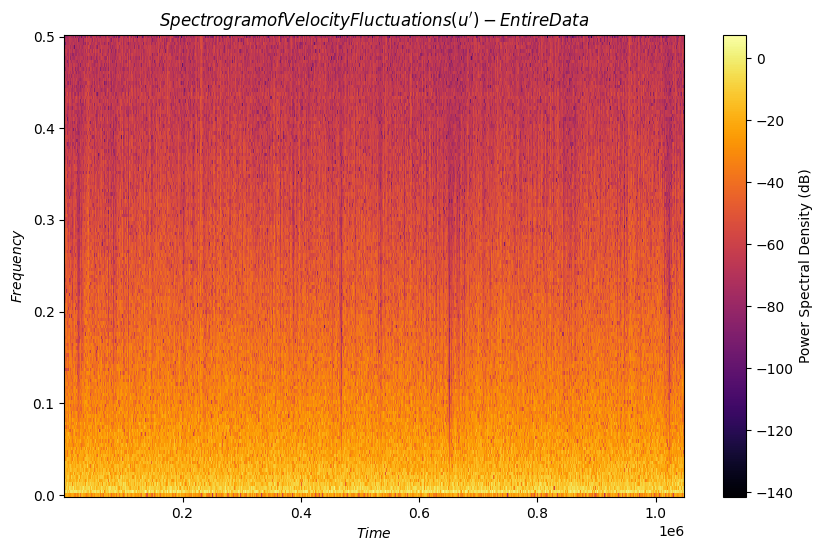

In [48]:
##4.5..1
fs = 1  # Sampling frequency (assuming 1 Hz)
f, t, Sxx = spectrogram(data['Velocity'], fs=fs)
fs_ensemble = 1  # Sampling frequency of the ensemble record (assuming 1 Hz)
f_ensemble, t_ensemble, Sxx_ensemble = spectrogram(chunks[0]['Velocity'], fs=fs_ensemble)
## visualize Spectogram of the velocity
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto', cmap='inferno')
plt.colorbar(label='Power Spectral Density (dB)')
plt.xlabel('$Time$')
plt.ylabel('$Frequency$')
plt.title('$Spectrogram of Velocity Fluctuations (u\') - Entire Data$')
plt.show()


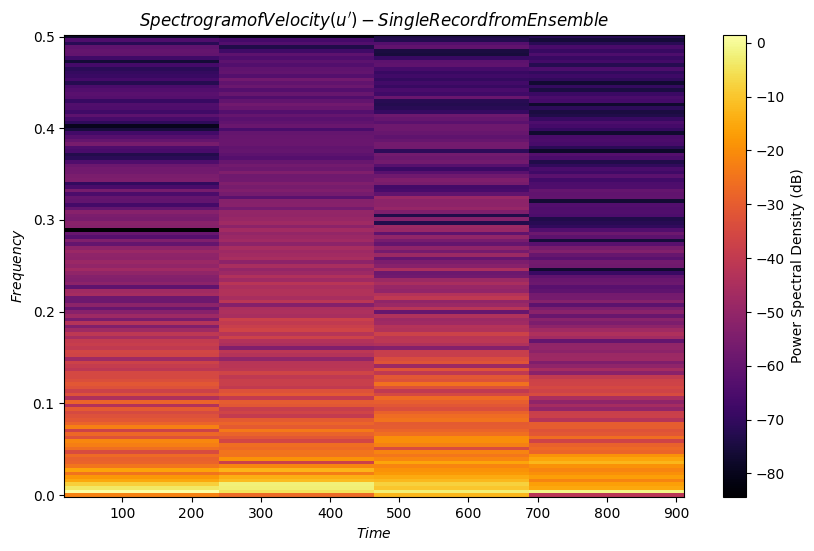

In [49]:
###4.5 Visualize for the single record from the ensemble
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_ensemble, f_ensemble, 10 * np.log10(Sxx_ensemble), shading='auto', cmap='inferno')
plt.colorbar(label='Power Spectral Density (dB)')
plt.xlabel('$Time$')
plt.ylabel('$Frequency$')
plt.title('$Spectrogram of Velocity (u\') - Single Record from Ensemble$')
plt.show()
